# Introducción a la resolución de ecuaciones diferenciales parciales por el método de diferencias finitas, enfocado a las ecuaciones de Navier-Stokes

## Convección 1D

La convección 1D es el primer paso en tratar de simular las ecuaciones de Navier-Stokes.

La ecuación que describe la convección 1D es
$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x}=0$$

Cuya solución es simplemente $u(x,t)=f(x-ct)$. Si se imponen condiciones iniciales $u(x,0)=u_0(x)$, entonces la solución en el tiempo es la propagación de la concdicion inicial, $\textit{i.e.}$ $u(x,t)=u_0(x-ct)$

Utilizando el método de diferencias finitas podemos discretizar el espacio y tiempo, y la función u y sus derivadas.

Distizaremos el espacio y tiempo con una malla de la forma $(x,t)=(i\Delta x,n\Delta t)\rightarrow (i,n)$. De igual forma pondremos $u(x,t) = u(i\Delta x,n\Delta t) = u_i^n$.

Así podemos aproximar las derivadas de u como:
$$\frac{\partial u}{\partial t}(x,t) \approx \frac{u_i^{n+1}-u_i^n}{\Delta t}$$
$$\frac{\partial u}{\partial x}(x,t) \approx \frac{u_{i}^n-u_{i-1}^n}{\Delta x}$$

Sustituyendo la aproximación en nuestra ecuación diferencial obtenemos:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c\frac{u_{i}^n-u_{i-1}^n}{\Delta x} = 0$$

De donde podemos despejar el siguiente paso como
$$u_i^{n+1}=u_i^n - c\frac{\Delta t}{\Delta x}\left(u_{i}^n-u_{i-1}^n\right) $$

In [3]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from matplotlib import animation

# importar el script para redireccionar el video 
%run 'libreria_video_html.ipynb'
%matplotlib inline

In [6]:
def avance_en_tiempo_conveccion(u0, nt, nx, dt, dx, flag=False):
    c = 1.          #La velocidad de la propagacion
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    un = ones(nx)
    #Este arreglo va guardando todos los pasos en el tiempo
    if flag: hist=[]
        
    u = u0
    for n in range(nt):
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        
        if flag: hist.append(un)
        
        #Para cada punto en el espacio se calcula el valor de la funcion en el tiempo siguiente
        for i in range(1, nx):
            u[i] = un[i]-c*dt/(dx)*(un[i]-un[i-1])

    if flag:
        return hist
    else:
        return u

A continuación ponemos las condiciones iniciales como una funcion escalon

$$
u_0(x) = 
    \begin{cases} 
    2 & : x \in (0.1,0.5)\\
    1 & : x \in (0,0.1)\bigcup(0.5,2)
  \end{cases}
$$

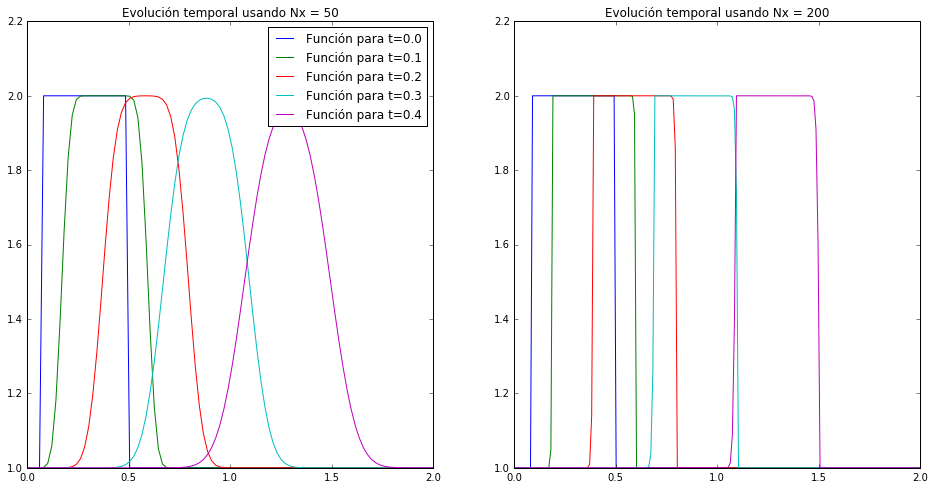

In [7]:
L = 2.          #Longitud de la malla
dt = 0.01       #Separacion temporal, Delta t
nx1= 100
nx2= 200

f, (ax, bx) = subplots(1, 2, figsize=(16, 8))
#Condicion inicial primer grafico
dx1 = L/(nx1-1)
u01 = ones(nx1)
u01[int(.1/dx1) : int(0.5/dx1+1.)]=2

#Condicion inicial segundo grafico
dx2 = L/(nx2-1.)
u02 = ones(nx2)
u02[int(.1/dx2) : int(0.5/dx2+1.)]=2

for nt in range(0, 50, 10):
    ax.plot(linspace(0,L,nx1), avance_en_tiempo_conveccion(u01, nt, nx1, dt, dx1),label=u'Función para t='+str(nt*dt))
    bx.plot(linspace(0,L,nx2), avance_en_tiempo_conveccion(u02, nt, nx2, dt, dx2),label=u'Función para t='+str(nt*dt))

ax.set_title(u"Evolución temporal usando Nx = 50")
bx.set_title(u"Evolución temporal usando Nx = 200")
ax.legend()

Notemos que claramente la evolución temporal de la solución varía según que tan fina sea la malla espacial utilizando la misma separación temporal en ambos casos, de la misma forma la solución depende el paso temporal realizado.

In [8]:
L = 2.          #Longitud de la malla
dt = 0.01       #Separacion temporal, Delta t
nx1= 100
nx2= 200

#Condicion inicial primer grafico
dx1 = L/(nx1-1)
u01 = ones(nx1)
u01[int(.1/dx1) : int(0.5/dx1+1.)]=2

#Condicion inicial segundo grafico
dx2 = L/(nx2-1.)
u02 = ones(nx2)
u02[int(.1/dx2) : int(0.5/dx2+1.)]=2

u1_sol = avance_en_tiempo_conveccion(u01, 100, nx1, dt, dx1, True)
u2_sol = avance_en_tiempo_conveccion(u02, 100, nx2, dt, dx2, True)

# Se define el ambiente en el que queremos hacer la animación
fig = figure()
ax = axes(xlim=(0, L), ylim=(0.95, 2.05))
linea1, = ax.plot([], [], lw=2)
linea2, = ax.plot([], [], lw=2)
T = 50 # periodo para generar T cuadros

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [])
    linea2.set_data([], [])
    return linea1,linea2

# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x1 = linspace(0, L, nx1)
    x2 = linspace(0, L, nx2)
    y1 = u1_sol[i]
    y2 = u2_sol[i]
    linea1.set_data(x1, y1),linea2.set_data(x2, y2),
    return linea1,linea2,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func=init, frames=2*T, interval=20, blit=True)

## Condición CFL en la ecuación de convección 1D

A continuación se crea una función cuyo único argumento es el tamaño de la malla a lo largo del eje $X$. Hacemos esto para probar que la idea "ingenua" de refinar la malla cada vez más no siempre es la forma de obtener una solución numérica más acertada.

In [23]:
def linearconv(nx):
    dx = 2./(nx-1)
    nt = 20
    dt = .02
    c = 1

    u = ones(nx)
    u[int(.2/dx) : int(0.5/dx+1)]=2
    
    figure(figsize=(8, 4))
    plot(linspace(0,2,nx),u,label=u'Condición inicial, Nx = '+str(nx),color='b');
    
    un = ones(nx)
    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

    plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' en t = '+str(nt*dt),color='r');
    ylim(1,2.2)
    legend()

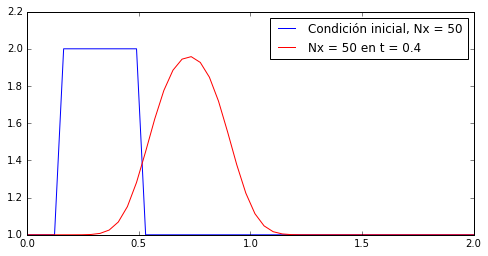

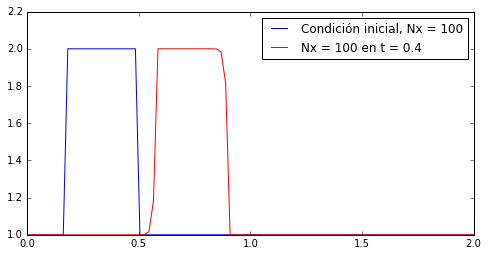

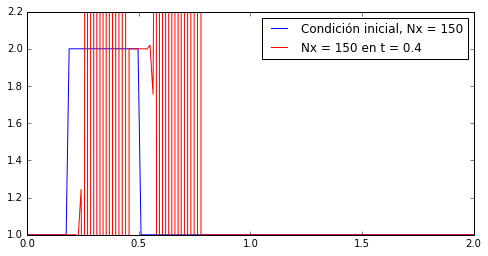

In [24]:
for nx in range(50, 151, 50): 
    linearconv(nx)

Para responder que ocurre debemos de enfocarnos en como se está implementando el código. 

Sabemos que la
solución de la ecuación de convección es ecuaciones de transporte de una onda en una sola dirección (dependiendo del signo de $c$), por lo tanto le podemos asignar una velocidad de propagación. 

El problema al discretizar tanto el espacio como el tiempo es cuando la distancia que recorre la onda en el tiempo $\Delta t$ sobre pasa la discretización en el espacio, $\Delta x$. 

De forma que se puede asegurar la estabilidad del método si se recurre a un proceso adaptativo donde en cada paso se varíe el $\Delta t$ en función de la velocidad de la onda en cada tiempo.

Así definimos $$\sigma = \frac{c \Delta t}{\Delta x} \leq 1$$

Donde $u$ es la velocidad de la onda, $\sigma$ se llama el número de Courant, este valor asegura que el método sea estable en toda la malla.

Por lo tanto si modificamos la función linearconv con el fin de tomar en cuenta el número de Courant obtendremos una mejor solución numérica.

In [27]:
def linearconv_CFL(nx):
    dx = 2./(nx-1)
    nt = 20
    c = 0.5
    sigma = 0.8

    dt = dx*sigma/c
    
    u = ones(nx)
    u[int(.2/dx) : int(0.5/dx+1)]=2
    
    figure(figsize=(8, 4))
    plot(linspace(0,2,nx),u,label=u'Condición inicial, Nx = '+str(nx),color='b');
    
    t=0
    un = ones(nx)
    while(t<=0.9):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])
        t+= dt

    plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' con t = '+str(trunc(10*t)/10.),color='r');
    ylim(1,2.2)
    legend()

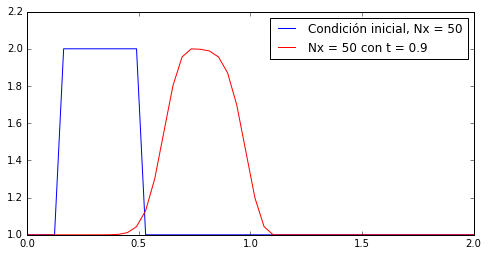

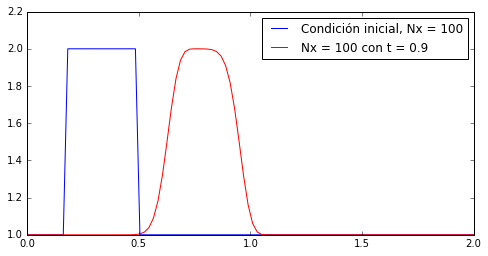

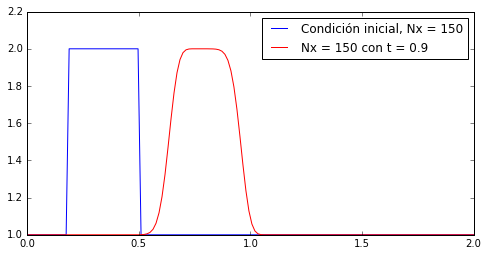

In [28]:
for nx in range(50, 151, 50): 
    linearconv_CFL(nx)

# La ecuación 1D de Burgers invísida

El siguiente paso para tratar las ecuaciones de Navier-Stokes es la ecuación invísida de Buergers ya que presenta un comportamiento no lineal en un fenómeno de transporte.

La ecuación con la que trataremos es la siguiente

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}=0$$

Discretizando la ecuación obtenemos

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_{i}^n-u_{i-1}^n}{\Delta x}=0$$

De donde

$$u_i^{n+1}=u_i^n - u_i^n \frac{\Delta t}{\Delta x} \left(u_{i}^n-u_{i-1}^n\right)$$

De forma que se puede asegurar la estabilidad del método si se recurre a un proceso adaptativo al igual que en el caso de la convección, donde en cada paso se varíe el $\Delta t$ en función de la velocidad de la onda en cada tiempo.

Así definimos $$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{max} = \frac{u_{max} \Delta t}{\Delta x}$$

Donde $u$ es la velocidad de la onda, $\sigma$ se llama el número de Courant y el valor máximo $\sigma_{max}$ es un valor que asegura que el método sea estable en toda la malla.

In [70]:
def avance_en_tiempo_burgers_invisida_CFL(nx, t_max, graf=False, flag=False):
    dx = 2./(nx-1)
    nt = 20
    sigma = 0.8
    
    u = ones(nx)
    u[int(.2/dx) : int(0.5/dx+1)]=2
    
    if graf:
        figure(figsize=(8, 4))
        plot(linspace(0,2,nx),u,label=u'Condición inicial, Nx = '+str(nx),color='b');
    
    if flag: hist=[]
    
    t=0
    un = ones(nx)
    while(t<=t_max):
        un = u.copy()
        if flag: hist.append(un)
        for i in range(1,nx):
            dt = dx*sigma/max(un)
            u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1])
        t += dt
        
    if flag:return hist
    
    if graf:
        plot(linspace(0,2,nx),u,label=u'Nx = '+str(nx)+' con t = '+str(trunc(10*t)/10.),color='r');
        ylim(1,2.2)
        legend()

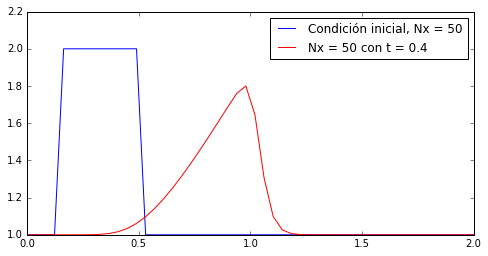

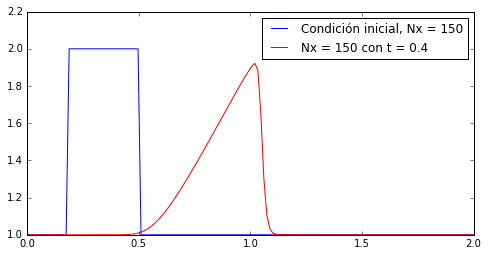

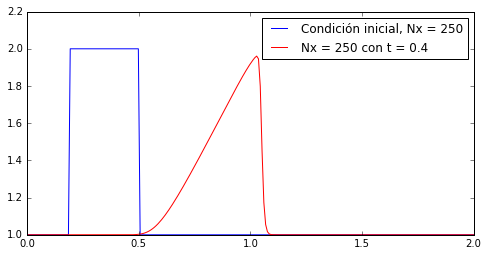

In [71]:
for nx in range(50, 251, 100):
    avance_en_tiempo_burgers_invisida_CFL(nx, 0.4, True)

In [77]:
L = 2
nx= 200
u_sol = avance_en_tiempo_burgers_invisida_CFL(nx, 0.6, False, True)

# Se define el ambiente en el que queremos hacer la animación
fig = figure()
ax = axes(xlim=(0, L), ylim=(0.95, 2.05))
linea1, = ax.plot([], [], lw=2)
ax.set_title(u'Evolución temporal de la ecuación de Burgers invísida')

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [])
    return linea1,

# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x1 = linspace(0, L, nx1)
    y1 = u1_sol[i]
    linea1.set_data(x1, y1),
    return linea1,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func=init, frames=len(u1_sol), interval=20, blit=True)

# La ecuación 1D de Burgers

La ecuación de Burgers es

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$$

Donde $\nu$ se conoce como un parámetro tipo viscosidad.

Discretizando la ecuación tenemos
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n+u_{i-1}^n-2u_i^n}{\left(\Delta x\right)^2} $$
De donde

$$u_i^{n+1}=u_i^n -u_i^n \frac{\Delta t}{\Delta x}\left(u_i^n-u_{i-1}^n\right) +\nu \frac{ \Delta t}{\left(\Delta x\right)^2} \left(u_{i+1}^n+u_{i-1}^n-2u_i^n \right)$$

In [18]:
def avance_en_tiempo_burgers(u0, nx, nt, dx, nu, sigma, flag=False):
    #Se utiliza la condicion CFL
    dt = sigma*dx**2/nu
    u = u0
    if flag: hist=[]
    for n in range(nt):
        un = u.copy()
        if flag: hist.append(un)
        for i in range(1, nx-1):
            u[i] = un[i] - un[i] * dt/dx *(un[i] - un[i-1]) + (nu*dt/dx**2)*(un[i+1]-2*un[i]+un[i-1])
    
    if flag:
        return hist
    else:
        return u

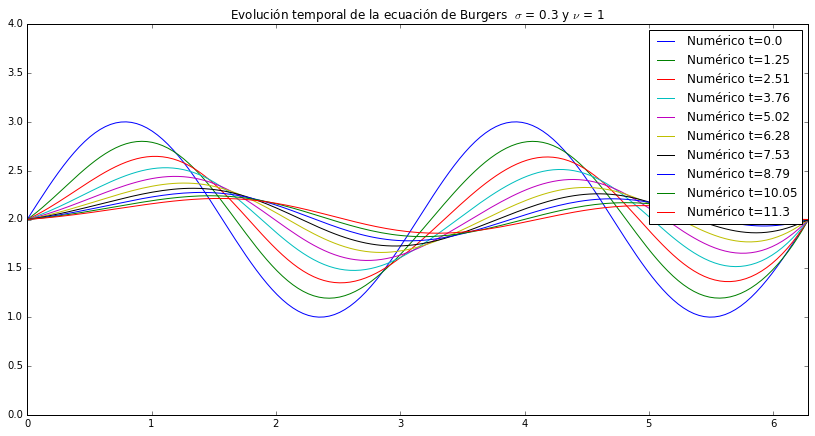

In [25]:
#Se definen las variables
nx = 151
dx = 2.*pi/(nx-1)
nu = 1
sigma = 0.3

x = linspace(0., 2.*pi, nx)
t = 0

figure(figsize=(14,7), dpi=100)
for nt in range(0, 1000, 100):
    dt = sigma*dx*nu
    u0 = 2*ones(nx)+sin(2*x)
    u = avance_en_tiempo_burgers(u0, nx, nt, dx, nu, sigma)
    
    plot(x, u, label=u'Numérico t='+str(trunc(100*nt*dt)/100))
    title(u'Evolución temporal de la ecuación de Burgers  $\sigma$ = '+str(sigma)+' y $\\nu$ = '+str(nu))
    xlim([0,2*pi])
    ylim([0,4])
    legend()

In [30]:
#Se definen las variables
nx = 101
dx = 2.*pi/(nx-1)
nu = 1
sigma = 0.3
nt = 300
x = linspace(0., 2.*pi, nx)
t = 0

dt = sigma*dx*nu
u0 = 2*ones(nx) + 2*sin(2*x)
    
u_sol = avance_en_tiempo_burgers(u0, nx, nt, dx, nu, sigma, True)

# Se define el ambiente en el que queremos hacer la animación
fig = figure()
ax = axes(xlim=(0, 2*pi), ylim=(0., 4.))
linea1, = ax.plot([], [], lw=2)

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [])
    return linea1,
s
# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x = linspace(0, 2*pi, nx)
    y1 = u_sol[5*i]
    linea1.set_data(x, y1),
    ax.set_title(u'Evolución temporal de la ecuación de Burgers  $\sigma$ = '+str(sigma)+' y $\\nu$ = '+str(nu))
    return linea1,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func = init, frames = nt/5, interval=20, blit=True)